# Examine conferences having multiple names

In [29]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib

In [18]:
path_raw = os.path.join("..","data","raw")
filename = os.path.join(path_raw,"springernature-scigraph-conferences.cc-zero.2017-11-07-UPDATED.nt")
file_cache = os.path.join("..","data","interim","exploration","multiple_conferences.pkl")
#nt_has_conference = "<http://scigraph.springernature.com/ontologies/core/hasConference>"
nt_name = "<http://scigraph.springernature.com/ontologies/core/name>"
nt_conference = "<http://scigraph.springernature.com/things/conferences/"

count = 0
filesize = 0
checkpoint = 0

pd.set_option('display.max_colwidth', -1)

In [19]:
try:
    with open(file_cache,"rb") as f:
        multiple_conferences = pickle.load(f)
except FileNotFoundError:
    def count_lines(filename):
        print("Start counting lines.")
        global filesize
        global count
        global checkpoint
        
        c = 0
        with open(filename) as f:
            for line in f:
                c += 1
        
        filesize = c
        count = 0
        checkpoint = int(filesize/100)
    
        print("Finished counting lines: {}".format(filesize))
        
    def increaseCount():
        global count
        global checkpoint
        
        count += 1
        if (count % checkpoint == 0):
            print("Checkpoint reached: {}%".format(int(count*100/filesize)))
    
    multiple_conferences = {}
    
    count_lines(filename)
    with open(filename) as f:
        for line in f:
            increaseCount()
            line = line.split(" ",2)
            if (line[1] == nt_name):
                if line[0].startswith(nt_conference):
                    try:
                        multiple_conferences[line[0]].append(line[2])
                    except KeyError:
                        multiple_conferences[line[0]] = [line[2]]
                        
    with open(file_cache,"wb") as f:
        pickle.dump(multiple_conferences, f)

In [20]:
df = pd.DataFrame(
    list(
            multiple_conferences.items()
    ),
    columns=["conference_id","names"]
)

df = df.set_index(["conference_id"])["names"].apply(pd.Series).stack().reset_index()
df.columns = ["conference_id","num","name"]

hist = df.groupby(["conference_id"]).size().reset_index()
hist.columns = ["conference_id","size"]
hist = hist.sort_values(by="size",ascending=False)

multis = df.loc[df["conference_id"].isin(hist[hist["size"]>1]["conference_id"])]

multis = multis.merge(hist,how="left",on=["conference_id","conference_id"]).sort_values(by="size",ascending=False)

In [21]:
multis

,conference_id,num,name,size
6,<http://scigraph.springernature.com/things/conferences/73b2a2df76c91742a5951569d7fe43df>,0,"""European Conference on Evolutionary Computation in Combinatorial Optimization"" .\n",4
7,<http://scigraph.springernature.com/things/conferences/73b2a2df76c91742a5951569d7fe43df>,1,"""European Conference on the Applications of Evolutionary Computation"" .\n",4
8,<http://scigraph.springernature.com/things/conferences/73b2a2df76c91742a5951569d7fe43df>,2,"""European Conference on Evolutionary Computation, Machine Learning and Data Mining in Bioinformatics"" .\n",4
9,<http://scigraph.springernature.com/things/conferences/73b2a2df76c91742a5951569d7fe43df>,3,"""International Conference on Evolutionary and Biologically Inspired Music and Art"" .\n",4
14,<http://scigraph.springernature.com/things/conferences/dd5986523541e9fdeb05d50476df2ddf>,0,"""European Conference on Evolutionary Computation in Combinatorial Optimization"" .\n",3
15,<http://scigraph.springernature.com/things/conferences/dd5986523541e9fdeb05d50476df2ddf>,1,"""European Conference on Evolutionary Computation, Machine Learning and Data Mining in Bioinformatics"" .\n",3
27,<http://scigraph.springernature.com/things/conferences/0bb0521d3af81f0d4aee4d35e9f6d08a>,2,"""International Workshop on Mining Complex Data"" .\n",3
26,<http://scigraph.springernature.com/things/conferences/0bb0521d3af81f0d4aee4d35e9f6d08a>,1,"""European Conference on Machine Learning"" .\n",3
25,<http://scigraph.springernature.com/things/conferences/0bb0521d3af81f0d4aee4d35e9f6d08a>,0,"""European Conference on Principles of Data Mining and Knowledge Discovery"" .\n",3
63,<http://scigraph.springernature.com/things/conferences/8add28aae1954ecef6e4bc225a500a82>,2,"""International Conference on Evolutionary and Biologically Inspired Music and Art"" .\n",3


conference_id    8286
dtype: int64
      conference_id
size               
1     8249         
2     32           
3     4            
4     1            


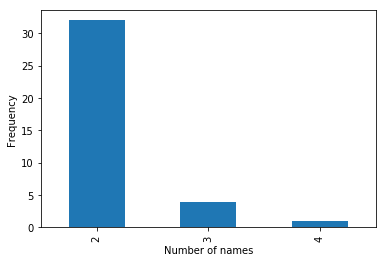

In [61]:
print(hist.groupby(by="size").count().sum())

print(
    hist.groupby(by="size").count()
)

hist[hist["size"]>1].groupby(by="size").count().plot(
    kind="bar"
)
plt.xlabel("Number of names")
plt.ylabel("Frequency")
plt.legend().remove()
plt.show()